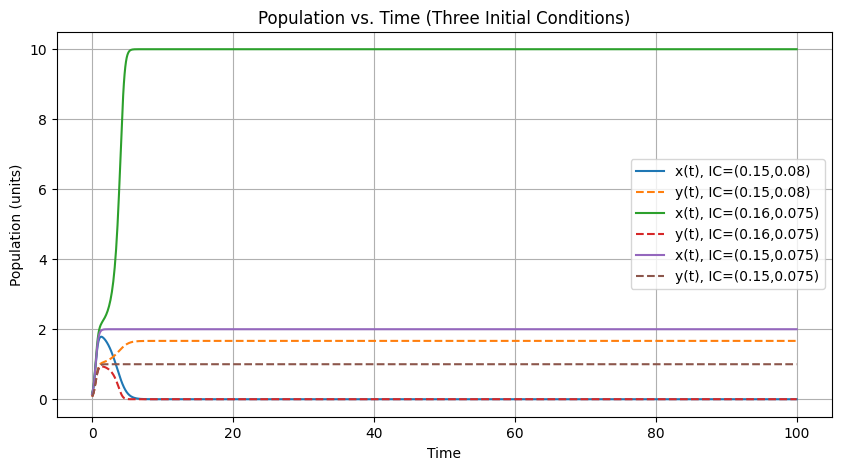

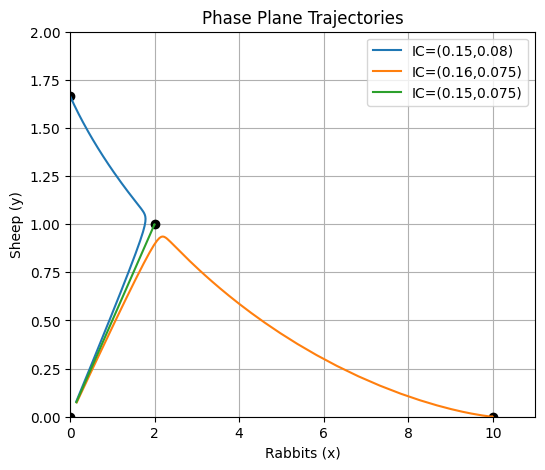

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ---------------------------------------------------------
# 1) Define the system of ODEs:
#    dot{x} = x (5 - x/2 - 4 y)
#    dot{y} = y (5 - x - 3 y)
# ---------------------------------------------------------

def lotka_volterra_competition(z, t):
    """ Returns [dx/dt, dy/dt] for our competition system. """
    x, y = z
    dxdt = x * (5 - x/2 - 4*y)
    dydt = y * (5 - x - 3*y)
    return [dxdt, dydt]

# ---------------------------------------------------------
# 2) Set up time range & initial conditions
# ---------------------------------------------------------
t = np.linspace(0, 100, 1000)  # from t=0 to t=100 (adjust as needed)

# The problem statement gives three initial conditions
initial_conditions = [
    (0.15, 0.08),
    (0.16, 0.075),
    (0.15, 0.075)
]

# ---------------------------------------------------------
# 3) Solve and plot X(t) and Y(t) for each initial condition
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
for (x0, y0) in initial_conditions:
    sol = odeint(lotka_volterra_competition, [x0, y0], t)
    x_sol = sol[:, 0]
    y_sol = sol[:, 1]
    # Plot x(t) and y(t) on the same axes
    plt.plot(t, x_sol, label=f"x(t), IC=({x0},{y0})")
    plt.plot(t, y_sol, label=f"y(t), IC=({x0},{y0})", linestyle='--')

plt.title("Population vs. Time (Three Initial Conditions)")
plt.xlabel("Time")
plt.ylabel("Population (units)")
plt.legend(loc="best")
plt.grid(True)

# ---------------------------------------------------------
# 4) Plot the phase‐plane trajectories for each initial condition
# ---------------------------------------------------------
plt.figure(figsize=(6, 5))

# We can also mark the equilibrium points:
#   (0,0), (10,0), (0,5/3), (2,1)
equilibria = [(0,0), (10,0), (0,5/3), (2,1)]
for eq in equilibria:
    plt.plot(eq[0], eq[1], 'ko', markersize=6)

# Solve again for each IC and plot in the phase plane
for (x0, y0) in initial_conditions:
    sol = odeint(lotka_volterra_competition, [x0, y0], t)
    x_sol = sol[:, 0]
    y_sol = sol[:, 1]
    plt.plot(x_sol, y_sol, label=f"IC=({x0},{y0})")

# Label everything
plt.title("Phase Plane Trajectories")
plt.xlabel("Rabbits (x)")
plt.ylabel("Sheep (y)")
plt.xlim(0, 11)  # just to see equilibria around x=10 clearly
plt.ylim(0, 2)   # to see y=5/3 clearly
plt.grid(True)
plt.legend(loc="best")

# Show both figures
plt.show()
